In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

### Load Data Training

In [2]:
train_df = "Train_Data.csv"
train_df = pd.read_csv(train_df)
train_df.head()

,Berita,Label,Category_id,Word2Vec Vector
0,"['ayah', 'pinrang', 'tangkap', 'sandera', 'anc...",keluarga,0,"[0.1796092838048935, 0.4170130491256714, -0.04..."
1,"['duga', 'anak', 'bawa', 'orang', 'kenal', 'at...",orang asing,4,"[0.10238317400217056, 0.2470414936542511, 0.27..."
2,"['dpa', 'laku', 'damping', 'korban', 'laku', '...",teman,3,"[0.35820725560188293, 0.20362965762615204, 0.2..."
3,"['inara', 'rusli', 'bawa', 'kunci', 'bukti', '...",keluarga,0,"[0.16313651204109192, 0.26164698600769043, 0.2..."
4,"['viral', 'video', 'bocah', 'ikat', 'tiang', '...",orang asing,4,"[0.2542842924594879, 0.24875245988368988, 0.26..."


### Load Data Validation

In [3]:
val_df = "Val_Data.csv"
val_df = pd.read_csv(val_df)
val_df.head()

,Berita,Label,Category_id,Word2Vec Vector
0,"['kali', 'anak', 'selebgram', 'aghnia', 'aniay...",pengasuh,1,"[0.3540416359901428, 0.3076167106628418, 0.085..."
1,"['heboh', 'anak', 'vincent', 'rompies', 'libat...",teman,3,"[0.28507089614868164, 0.20352721214294434, 0.1..."
2,"['keras', 'sma', 'negeri', 'tasikmalaya', 'mas...",teman,3,"[0.277415931224823, 0.2662486135959625, 0.2400..."
3,"['poin', 'kpai', 'kawal', 'bullying', 'geng', ...",teman,3,"[0.28439921140670776, 0.27106228470802307, 0.3..."
4,"['duga', 'hamil', 'jual', 'anak', 'hasil', 'se...",keluarga,0,"[0.4781922698020935, 0.3863716125488281, 0.245..."


### Processing The Data for Neural Network Input

In [4]:
# Get the locations
X_train = train_df['Word2Vec Vector']
y_train = train_df['Category_id']
X_val = val_df['Word2Vec Vector']
y_val = val_df['Category_id']

In [5]:
# Convert string to float
X_train = np.array([list(map(float, row.strip("[]").split(','))) for row in X_train])
print(X_train)
X_train = X_train.T

X_val = np.array([list(map(float, row.strip("[]").split(','))) for row in X_val])
print(X_val)
X_val = X_val.T

[[ 0.17960928  0.41701305 -0.04744937 ...  0.40574414  0.245582
   0.08898055]
 [ 0.10238317  0.24704149  0.27464882 ...  0.08813259  0.30407691
   0.43934801]
 [ 0.35820726  0.20362966  0.2630544  ...  0.2579141   0.35038081
   0.36289123]
 ...
 [ 0.27806711  0.24155277  0.24423018 ...  0.28065443  0.53148139
   0.43777528]
 [ 0.42479664  0.10447986 -0.03571824 ...  0.26021251  0.16793445
   0.25592601]
 [ 0.35719058  0.26109946  0.15572512 ...  0.1309738   0.32690907
   0.12616619]]
[[ 0.35404164  0.30761671  0.08512706 ...  0.2467062   0.2330083
   0.29866689]
 [ 0.2850709   0.20352721  0.14480667 ...  0.20088911  0.2974396
   0.22488372]
 [ 0.27741593  0.26624861  0.24004306 ...  0.2734699   0.46699813
   0.09709835]
 ...
 [ 0.34807277  0.34124702 -0.12281044 ...  0.40926725  0.36617047
   0.1402137 ]
 [ 0.26805174  0.2869263   0.12354009 ...  0.36130354  0.19468924
   0.23578319]
 [ 0.27741507  0.2287111  -0.0033286  ...  0.2329713   0.16494793
   0.14489825]]


In [6]:
X_train

array([[ 0.17960928,  0.10238317,  0.35820726, ...,  0.27806711,
         0.42479664,  0.35719058],
       [ 0.41701305,  0.24704149,  0.20362966, ...,  0.24155277,
         0.10447986,  0.26109946],
       [-0.04744937,  0.27464882,  0.2630544 , ...,  0.24423018,
        -0.03571824,  0.15572512],
       ...,
       [ 0.40574414,  0.08813259,  0.2579141 , ...,  0.28065443,
         0.26021251,  0.1309738 ],
       [ 0.245582  ,  0.30407691,  0.35038081, ...,  0.53148139,
         0.16793445,  0.32690907],
       [ 0.08898055,  0.43934801,  0.36289123, ...,  0.43777528,
         0.25592601,  0.12616619]])

In [7]:
X_val

array([[ 0.35404164,  0.2850709 ,  0.27741593, ...,  0.34807277,
         0.26805174,  0.27741507],
       [ 0.30761671,  0.20352721,  0.26624861, ...,  0.34124702,
         0.2869263 ,  0.2287111 ],
       [ 0.08512706,  0.14480667,  0.24004306, ..., -0.12281044,
         0.12354009, -0.0033286 ],
       ...,
       [ 0.2467062 ,  0.20088911,  0.2734699 , ...,  0.40926725,
         0.36130354,  0.2329713 ],
       [ 0.2330083 ,  0.2974396 ,  0.46699813, ...,  0.36617047,
         0.19468924,  0.16494793],
       [ 0.29866689,  0.22488372,  0.09709835, ...,  0.1402137 ,
         0.23578319,  0.14489825]])

In [8]:
y_train = np.array(y_train)
y_val = np.array(y_val)

In [9]:
# Make it suitable for my Neural Network input
print("Shape X_Train: ", X_train.shape)
print("Shape y_Train: ", y_train.shape)
print("Shape X_Val: ", X_val.shape)
print("Shape y_Val: ", y_val.shape)

Shape X_Train:  (100, 780)
Shape y_Train:  (780,)
Shape X_Val:  (100, 97)
Shape y_Val:  (97,)


In [10]:
print("X_train Type:", type(X_train))
print("y_train Type:", type(y_train))
print("X_val Type:", type(X_val))
print("y_val Type:", type(y_val))

X_train Type: <class 'numpy.ndarray'>
y_train Type: <class 'numpy.ndarray'>
X_val Type: <class 'numpy.ndarray'>
y_val Type: <class 'numpy.ndarray'>


### Model Y2 (Node Hidden Layer 1 = 30, Learning Rate = 0.005)

In [11]:
from Neural_Network_Val import NeuralNetwork

In [12]:
model_name = "Y2"

In [13]:
model = NeuralNetwork(X_train.shape[0], 30, 5)

# init time for training
import time
start_time = time.time()
history_cost, history_acc, val_cost, val_acc = model.train_until_cost_doesnt_change(
    X_train, y_train, 0.005, X_val, y_val
)
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1 - Train Loss: 0.294629, Train Acc: 0.503846 | Val Loss: 0.311966, Val Acc: 0.474227
Epoch 2 - Train Loss: 0.294043, Train Acc: 0.503846 | Val Loss: 0.311274, Val Acc: 0.474227
Epoch 3 - Train Loss: 0.293476, Train Acc: 0.503846 | Val Loss: 0.310599, Val Acc: 0.474227
Epoch 4 - Train Loss: 0.292927, Train Acc: 0.503846 | Val Loss: 0.309942, Val Acc: 0.474227
Epoch 5 - Train Loss: 0.292395, Train Acc: 0.503846 | Val Loss: 0.309303, Val Acc: 0.474227
Epoch 6 - Train Loss: 0.291880, Train Acc: 0.503846 | Val Loss: 0.308683, Val Acc: 0.474227
Epoch 7 - Train Loss: 0.291380, Train Acc: 0.503846 | Val Loss: 0.308081, Val Acc: 0.474227
Epoch 8 - Train Loss: 0.290895, Train Acc: 0.503846 | Val Loss: 0.307495, Val Acc: 0.474227
Epoch 9 - Train Loss: 0.290425, Train Acc: 0.503846 | Val Loss: 0.306922, Val Acc: 0.474227
Epoch 10 - Train Loss: 0.289969, Train Acc: 0.503846 | Val Loss: 0.306367, Val Acc: 0.474227
Epoch 11 - Train Loss: 0.289526, Train Acc: 0.503846 | Val Loss: 0.305825, Val 

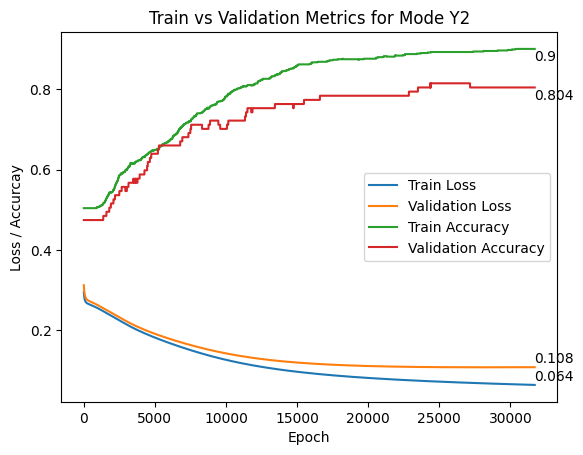

In [14]:
# plot the cost and accuracy in one graph
plt.plot(history_cost, label='Train Loss')
plt.plot(val_cost, label='Validation Loss')
plt.plot(history_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.text(len(history_cost) - 50, history_cost[-1] + 0.01, str(round(history_cost[-1], 3)))
plt.text(len(history_acc) - 50, history_acc[-1] - 0.03, str(round(history_acc[-1], 3)))
plt.text(len(val_cost) - 50, val_cost[-1] + 0.01, str(round(val_cost[-1], 3)))
plt.text(len(val_acc) - 50, val_acc[-1] - 0.03, str(round(val_acc[-1], 3)))
plt.xlabel('Epoch')
plt.ylabel('Loss / Accurcay')
plt.title('Train vs Validation Metrics for Mode ' + model_name)
plt.legend()

In [15]:
# save the model and the cost and accuracy
file_name = 'NeuralNetwork_Model_' + model_name + '.pkl'
file_name_cost_acc = 'Cost_Accuracy_Model_' + model_name + '.csv'
with open(file_name, 'wb') as f:
    pickle.dump(model, f)

# Save cost & accuracy
cost_acc = pd.DataFrame({
    'train_cost': history_cost,
    'train_acc': history_acc,
    'val_cost': val_cost,
    'val_acc': val_acc
})
cost_acc.to_csv(file_name_cost_acc, index=False)

In [16]:
prediction = model.predict(X_train, y_train)
print(prediction)

(array([0, 0, 3, 0, 4, 2, 0, 0, 3, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3,
       3, 4, 0, 2, 4, 0, 0, 3, 1, 4, 0, 0, 3, 0, 3, 1, 1, 0, 1, 4, 0, 4,
       0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 4,
       1, 3, 4, 0, 0, 3, 0, 0, 3, 0, 4, 1, 0, 3, 4, 0, 0, 1, 0, 0, 4, 0,
       4, 1, 3, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 2, 0, 3,
       2, 0, 0, 0, 3, 0, 0, 0, 0, 3, 4, 0, 4, 0, 0, 3, 0, 1, 0, 0, 3, 4,
       4, 2, 0, 3, 3, 3, 0, 0, 4, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 4, 0,
       0, 4, 2, 0, 4, 3, 4, 3, 0, 0, 0, 3, 2, 0, 4, 0, 0, 0, 0, 1, 4, 4,
       0, 3, 0, 4, 1, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 4, 4, 1,
       4, 1, 0, 4, 3, 0, 2, 3, 2, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0,
       4, 0, 0, 0, 0, 0, 0, 3, 1, 1, 0, 0, 4, 2, 0, 0, 0, 4, 0, 4, 2, 0,
       3, 4, 4, 0, 3, 0, 0, 4, 4, 0, 2, 0, 2, 3, 0, 0, 4, 4, 4, 1, 0, 3,
       0, 4, 0, 0, 0, 4, 4, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 3, 0, 0, 0, 3,
       3, 0, 0, 0, 0, 4, 0, 3, 3, 3, 3, 2, 0, 4, 0

In [17]:
prediction = model.predict(X_train, y_train)
print(prediction)

(array([0, 0, 3, 0, 4, 2, 0, 0, 3, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3,
       3, 4, 0, 2, 4, 0, 0, 3, 1, 4, 0, 0, 3, 0, 3, 1, 1, 0, 1, 4, 0, 4,
       0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 4,
       1, 3, 4, 0, 0, 3, 0, 0, 3, 0, 4, 1, 0, 3, 4, 0, 0, 1, 0, 0, 4, 0,
       4, 1, 3, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 2, 0, 3,
       2, 0, 0, 0, 3, 0, 0, 0, 0, 3, 4, 0, 4, 0, 0, 3, 0, 1, 0, 0, 3, 4,
       4, 2, 0, 3, 3, 3, 0, 0, 4, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 4, 0,
       0, 4, 2, 0, 4, 3, 4, 3, 0, 0, 0, 3, 2, 0, 4, 0, 0, 0, 0, 1, 4, 4,
       0, 3, 0, 4, 1, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 4, 4, 1,
       4, 1, 0, 4, 3, 0, 2, 3, 2, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0,
       4, 0, 0, 0, 0, 0, 0, 3, 1, 1, 0, 0, 4, 2, 0, 0, 0, 4, 0, 4, 2, 0,
       3, 4, 4, 0, 3, 0, 0, 4, 4, 0, 2, 0, 2, 3, 0, 0, 4, 4, 4, 1, 0, 3,
       0, 4, 0, 0, 0, 4, 4, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 3, 0, 0, 0, 3,
       3, 0, 0, 0, 0, 4, 0, 3, 3, 3, 3, 2, 0, 4, 0